# Capstone Project - The Battle of Neighborhoods (Week 2) Report

## Table of contents
* [Introduction](#introduction)
* [Objectives](#objective)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)


## Introduction <a name="introduction"></a>

WIth the increasing usage of social media, cafe are gaining popularity with the younger population. Being the city with the youngest population in Canada and coupled with a large population, **Calgary** will be the city of interest for this capstone project. For the stakeholders who wish to ride on the trend and open a cafe, this project will provide insights on prime location that can attract influencers and youngsters to the cafe in Calgary.

The objective of this capstone project is to assit stakeholders in their search for the optimal location for a instagramable cafe through exploring the various neighbourhoods in Calgary. As the young population are our main targeted crowd, the ideal neighbourhood include areas that are popular with the young population such as **shopping malls**, **bowling alley**, **movie theatres** and **parks**. Also, it will be best if the cafe can be situated in a vincinity with low number of **cafe/coffee shops**.

## Objectives <a name="objective"></a>

This capstone project aims to suggest an optimal location for the setup of a cafe in Calgary that has younger crowds. Hence the deciding factors of the neighbourhood should include: 

1. Number of competitors (cafes and coffee shops) witnin the vincinity
2. Number of entertainment outlets (shopping malls, bowling alley and movie theatres) in the neighbourhood

## Data <a name="data"></a>

### Webscrapping of the geocoordinates information

We will extract the the geocoordinates of the various neighbourhoods of Calgary, Alberta from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T by webscrapping. Information such as postal codes, community name, neighbourhood name, latitude and longitude will be scrapped and store in a dataframe using Pandas.

For each neighbourhood, we will retrieve the following information through Foursquare API:
1. Neighbourhood Names
2. Neighbourhood latitudes and longitudes
3. List of competitors with geocodes (category: cafes and coffee shops)
4. List of entertainment oultets and parks with geocodes (Category: malls, bowling alley, movie theatres, parks)


# Methodology <a name="methodology"></a>

For this capstone project, there are a couple of factors that we will consider for the focus area. 1) The area must have low number of cafes and coffee shops within the vinicity and 2) the area must have high traffic of youth population, with high count of shopping malls and movie theathers. 

First, we will explore the neighborhoods in the Calgary to capture all the relevant venues and their categories.

Next, we will limit the categories to only shopping malls and movie theathers for entertainment outlets. The list of competitors which include cafe and coffee shops will

After which, we will identify some promising areas with high traffic of youth population and using k-means clusterings. 

# Results <a name="results"></a>

### Count of entertainments and parks per neighbourhood

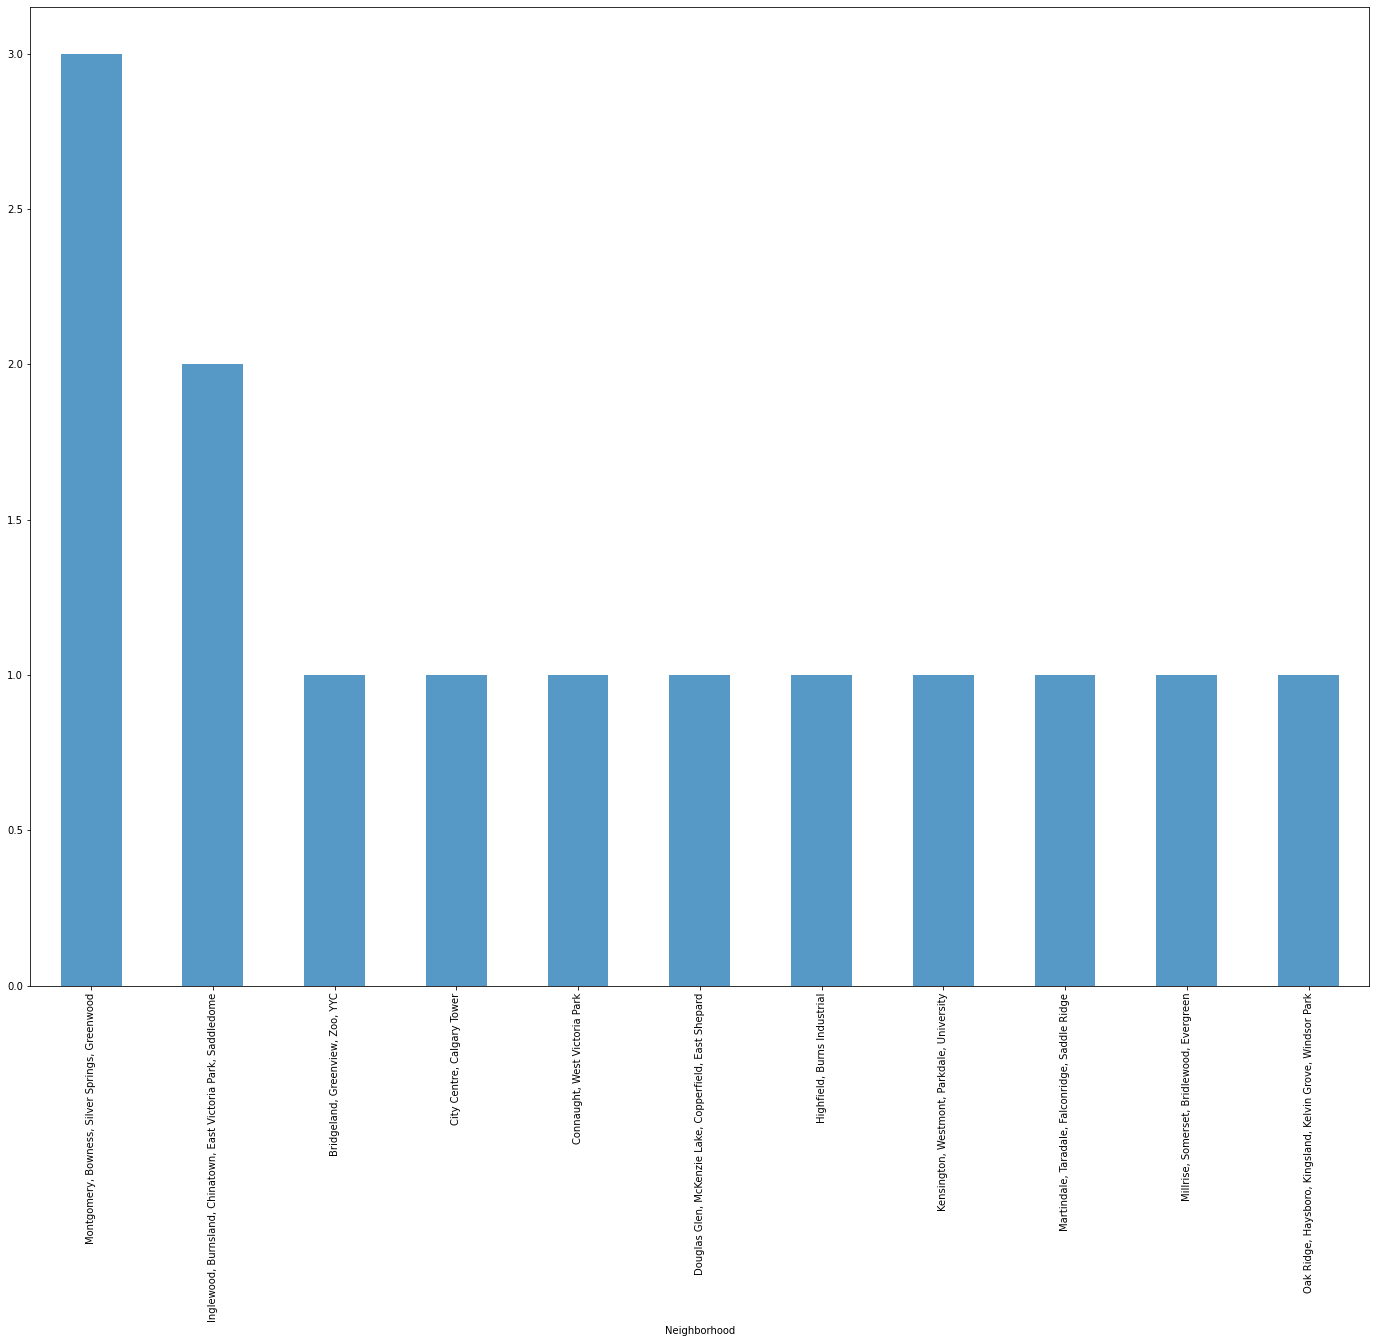

In [22]:
le_count.plot(kind='bar',figsize=(24,18),alpha=0.75)

Neighourhood Montgomery, Bowness, Silver Springs, Greenwood is found to have the highest number of entertainment outlets and parks.

### Count of competitiors per neighbourhood

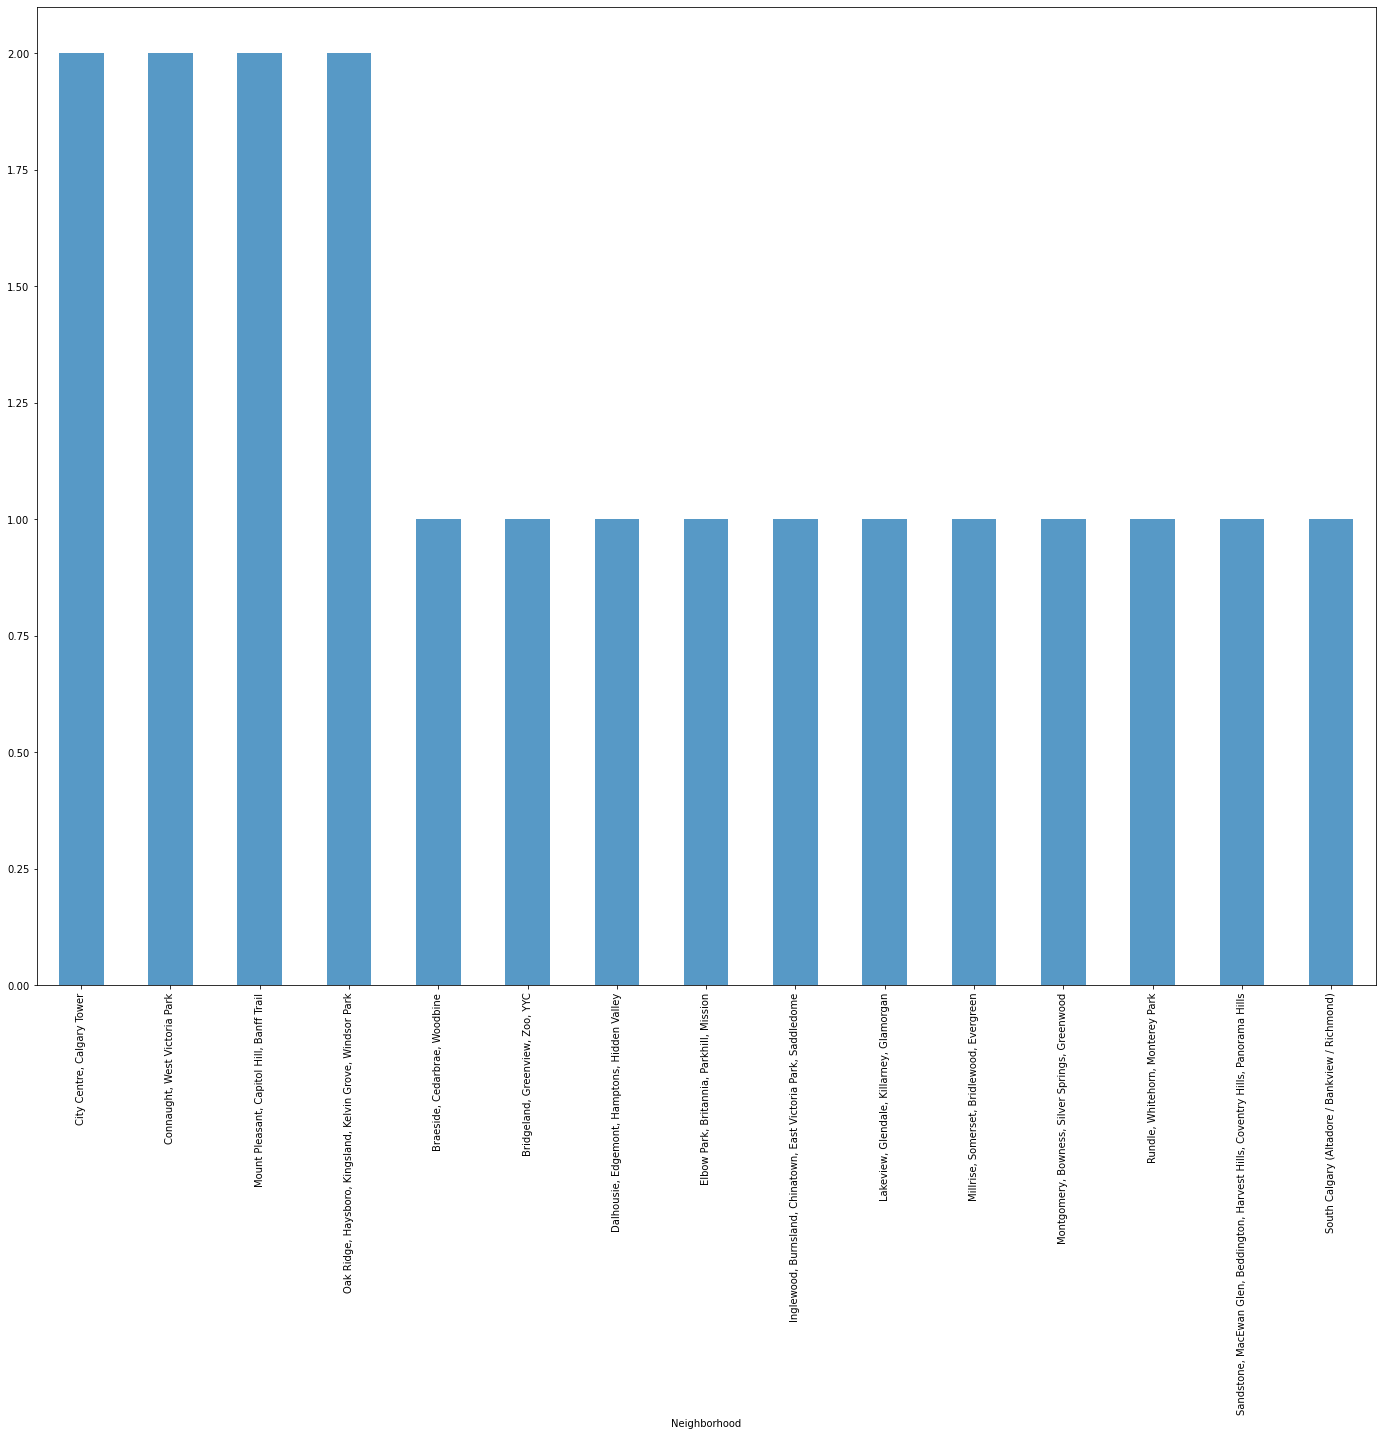

In [23]:
lc_count.plot(kind='bar',figsize=(24,18),alpha=0.75)

Four neighbourhood has been identified to habe the highest count. They are 1) City Centre, Calgary Tower, 2) Connaught, West Victoria Park, 3) Mount Pleasant, Capitol Hill, Banff Trailand 4) Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park.

### Potential Areas

For better visulisation, we have created a map to highlight the various clusters for potential areas. The green dots displayed the potential clusters while the green dots show the location of the competitors. 

In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calgary_merged['Latitude'], calgary_merged['Longitude'], calgary_merged['Neighborhood'],kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], 
        radius=5, 
        popup=label, 
        color='green', 
        fill=True, 
        fill_color='green', 
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# set red markers for competitors
markers_colors = []
for lat, lon, poi, cluster in zip(list_competitors['Venue Latitude'], list_competitors['Venue Longitude'], list_competitors['Neighborhood'],kmeans.labels_):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon], 
        radius=5, 
        popup=label, 
        color='red', 
        fill=True, 
        fill_color='red', 
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# Discussion <a name="discussion"></a>

Bringing us back to the objectives of this capstone project, the aim is to open a cafe that is within a vinicity with high flow of young population. Hence, neighbourhoods that contains high count of malls, bowling alleys and movie theatres are of interest as these are places that the young population will frequent. Parks are included as they are potential spots for dates. We are also interested in locating places with high count of competitors (other cafes and coffee shops).

Under the methodology, we have extracted list of entertainment outlets and park and list of competitors. Graphs of the respective lists have been ploted in the Results for comparison.  Neghbourhoods Montgomery, Bowness, Silver Springs, Greenwood is identified to have the highest count of entertainment outlets and parks. THis means that these areas are believed to have higher volume of young population traffic.From the competitor counts graph, we can see that these neighbourhoods have fewer cafes and coffee shops as compared to their couterparts. 

# Conclusion <a name="conclusion"></a>

Neghbourhoods Montgomery, Bowness, Silver Springs, Greenwood have been identified to be potential spots for the opening of an cafe. Given that these neghbourhoods consists of the highest count of entertainment outlets and parks, couple with few competitors within the vincity. 